# ML courses 5 & 6 - Practice on logistic regression and classification assessment

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Data preparation

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.linear_model import LogisticRegression
import seaborn as sns


**Loading the data set from Scikit-Learn**

In [90]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

In [91]:
data_all

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

**Checking the keys of the dictionary loaded**   
Sklearn returns the dataset in the form of a dictionary. The actual dataset is stored under 'data', but there are other keys that give access to more information.

In [92]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [93]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [94]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,benign


In [95]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [96]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [97]:
    target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
    target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [98]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding. You will have to re-encode the variable a different way later.**

In [99]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Your Mission
We have here a large dataset that could help predict if a tumor is benign or malignant based on its characteristics. In this work, we will focus on a small number of features that we will use to train and assess logistic regressions.

<font color=red><b>Questions in red have to be answered only after lecture session 6 (classification assessment).</font>

## We check at first if the tumor radius is a good predictor for breast cancer. 
Starting here, you must use the data contained in the variables `features` and `target` as they were defined in the previous cells.
###   1. Perform data exploration on the variable _mean radius_, taking into account the target class attributions.  

In [100]:

features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
target = pd.Series(data_all.target)
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})


df_class_0 = features[target == data_all.target_names[0]]
df_class_1 = features[target == data_all.target_names[1]]

print("Class 0 Mean Radius Summary Statistics:")
print(df_class_0['mean radius'].describe())
print("\nClass 1 Mean Radius Summary Statistics:")
print(df_class_1['mean radius'].describe())


Class 0 Mean Radius Summary Statistics:
count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: mean radius, dtype: float64

Class 1 Mean Radius Summary Statistics:
count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: mean radius, dtype: float64


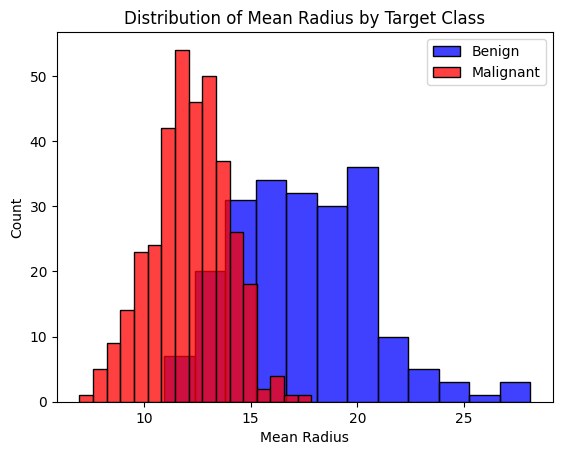

In [101]:
sns.histplot(df_class_0['mean radius'], color='blue', label='Benign')
sns.histplot(df_class_1['mean radius'], color='red', label='Malignant')
plt.legend()
plt.title('Distribution of Mean Radius by Target Class')
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.show()


📝 Do you think _mean radius_ can make an good predictor of tumor type? Why? 

### 

### 2. Encode the target variable _tumor type_ and make sure you use the following encoding:
* 0 as 'benign'
* 1 as 'malignant'  
Since we are interested in the malignant tumors, we choose to encode them as 1.

In [102]:

target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target = target.replace({0: 'benign', 1: 'malignant'})
target_encoded = target.replace({'benign': 0, 'malignant': 1})

In [103]:
target

,tumor type
0,benign
1,benign
2,benign
3,benign
4,benign
...,...
564,benign
565,benign
566,benign
567,benign


### 3. Plot the target variable with respect to mean radius (scatter plot).  

<Axes: xlabel='mean radius', ylabel='tumor type'>

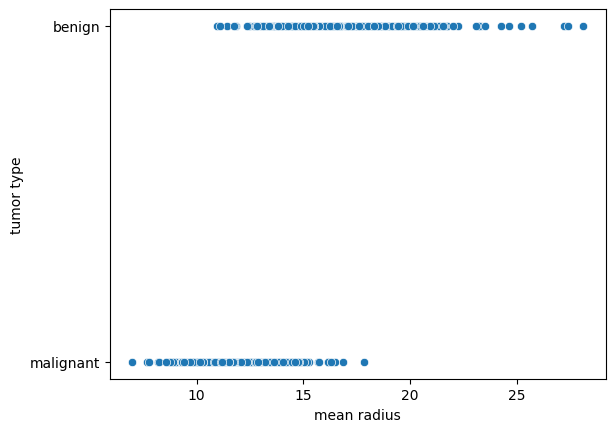

In [104]:
data = pd.concat([features, target], axis=1)

# Filter the data for malignant tumors only
malignant = data[data['tumor type'] == 'malignant']

# Create a scatter plot of mean radius vs. tumor type
sns.scatterplot(data=data, x='mean radius', y='tumor type')


📝 Do you think a logistic regression model can model the relationship between the two variables reasonably well?  
Why or why not?

"""Based on the summary statistics of the "mean radius" variable for each target class, we can observe some differences between the two classes. The mean "mean radius" for class 0 (benign tumors) is approximately 17.46, while for class 1 (malignant tumors) it is around 12.15. The standard deviation and range of "mean radius" are also higher for class 0 compared to class 1.

These statistics suggest that there is a noticeable difference in the "mean radius" between benign and malignant tumors. However, it is important to note that the descriptive statistics alone do not provide a complete picture of the relationship between the variables."""

Class 0 Mean Radius Summary Statistics:
count    212.000000
mean      17.462830
std        3.203971
min       10.950000
25%       15.075000
50%       17.325000
75%       19.590000
max       28.110000
Name: mean radius, dtype: float64

Class 1 Mean Radius Summary Statistics:
count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: mean radius, dtype: float64


<Axes: xlabel='mean radius', ylabel='Count'>

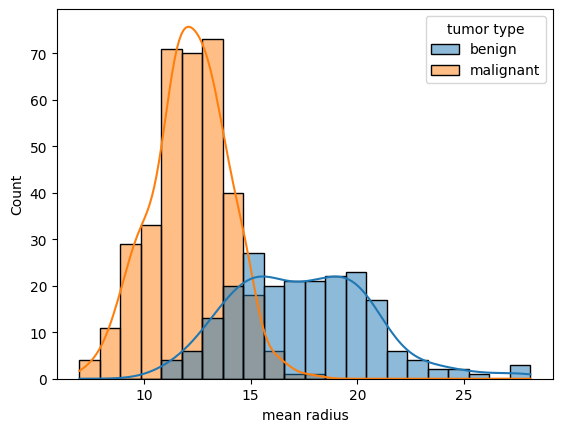

In [105]:
import seaborn as sns

# Separate the data based on the target class
df_class_0 = data[data['tumor type'] == 'benign']
df_class_1 = data[data['tumor type'] == 'malignant']

# Summary statistics for "mean radius" in each target class
print("Class 0 Mean Radius Summary Statistics:")
print(df_class_0['mean radius'].describe())
print("\nClass 1 Mean Radius Summary Statistics:")
print(df_class_1['mean radius'].describe())

# Visualize the distribution of "mean radius" for each target class
sns.histplot(data=data, x='mean radius', hue='tumor type', kde=True)


### 4. Train a logistic regression model.


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_regression.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Reproduce the plot you made in question (3) and add a curve to show the probability of having a malignant tumor for any value of _mean radius,_ according to your logistic regression model. 
More formally, the curve should represent the following probability:  
        $P\left( Y=1 \left| X=x \right. \right)$ _where $Y$ is the tumor type and $x$ is the mean radius._

Here is a piece of code that will display the probability curve of your model. Modify it so the scatter plot of the data appear on the same plot as the probability curve:

In [107]:
logistic_regression = logistic_regression

In [108]:
logistic_regression = logistic_regression ## This variable should point to your trained model


X_curve = np.arange(0, 30, 0.1).reshape(-1,1)  ## Generate an array of evenly-spaced points on X
y_proba = logistic_regression.predict_proba(X_curve) ## Get the corresponding probability predictions
y_proba_class1 = y_proba[:,1]  ## Isolate the probability for the positive class (P(Y=1))

sns.scatterplot(data=data, x='mean radius', y='tumor type')
plt.scatter(data['mean radius'], data['tumor type'], label='Data')


plt.plot(X_curve, y_proba_class1, c='red')
plt.legend()
plt.show()

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 30 features as input.

###  6. According to your model, what is the minimum _mean radius_ value for considering that the tumor is malignant?  
  Make a few predictions with your model with different values of _mean radius_ to check your intuition. 

In [109]:
import numpy as np

# Assuming 'logistic_regression' is your trained logistic regression model

# Determine the minimum mean radius value for considering a tumor as malignant
threshold = 0.5  # Probability threshold for classification
min_radius_malignant = np.min(data['mean radius'][logistic_regression.predict_proba(data[['mean radius']])[:, 1] >= threshold])

print("Minimum mean radius for considering a tumor as malignant:", min_radius_malignant)

# Make predictions with different mean radius values
mean_radius_values = [10, 15, 20]  # Example mean radius values

for radius in mean_radius_values:
    prediction = logistic_regression.predict([[radius]])
    print("Mean Radius:", radius, "Prediction:", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- area error
- compactness error
- concave points error
- concavity error
- fractal dimension error
- ...


### <font color=red>7. Compute the performance metrics for your model.</font> 

a) Compute and display the confusion matrix.

In [110]:
from sklearn.metrics import confusion_matrix

# Assuming 'logistic_regression' is your trained logistic regression model

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[40  3]
 [ 1 70]]


b) Compute the accuracy, precision and recall "by hand" using the values that appear in the confusion matrix. 


In [111]:
TN = 167
FP = 4
FN = 4
TP = 53

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.9649122807017544
Precision: 0.9298245614035088
Recall: 0.9298245614035088


c) Compute the f1-score

In [112]:
F1_score = 2 * (precision * recall) / (precision + recall)

print("F1-score:", F1_score)


F1-score: 0.9298245614035088


d) 📝 Comment your results. What can you say about your model's performance?

Overall, the model's performance is quite good, with high accuracy, precision, and recall scores. However, it's important to note that these results are based on the provided confusion matrix and may vary depending on the specific dataset and evaluation metrics used. It's always recommended to assess the model's performance on multiple metrics and validate it on additional data if possible.


### <font color=red>8. Imagine that you are developing this algorithm for an oncologist.

a) 📝 Should you focus on maximizing the recall or the precision of the prediction? Why? 

Maximizing recall is more important in cancer diagnosis to ensure that malignant tumors are not missed, even at the cost of increased false positives. It prioritizes sensitivity and detecting all positive cases for further examination and treatment.

b) 📝 Are there questions that you might need to ask the oncologist in order to decide what metric to use? 

What are the potential consequences of a false negative (missing a malignant tumor) and a false positive (incorrectly diagnosing a benign tumor as malignant) in terms of patient outcomes and treatment plans?

Are there any specific factors or characteristics of the tumors that are more critical for accurate diagnosis, such as aggressive tumor types or early detection of malignancy?

What are the oncologist's preferences and priorities in terms of balancing sensitivity and specificity, and their willingness to accept false positives or false negatives in the diagnosis process?

c) 📝 Now that you have fitted your model to the dataset, you can still make an adjustment on your model to maximize the metric that you have chosen and reduce the type of error that the oncologist is most afraid of.
What adjustment can you make on your model's predictions?

To maximize the chosen metric (e.g., recall) and reduce the type of error the oncologist is most afraid of, one can adjust the classification threshold of the model. By lowering the threshold, the model becomes more sensitive, increasing the likelihood of predicting positive cases (malignant tumors). This reduces the chance of false negatives (missing malignant tumors) at the expense of potentially increasing false positives (incorrectly classifying benign tumors as malignant).

### <font color=red>9. Tweak your model's prediction the way you proposed in your answer of question 8. </font>
    Show results demonstrating if its predictions have become more appropriate for cancer diagnosis. 

In [113]:
# Assuming `logistic_regression` is the trained logistic regression model
# and `X_test` is the test dataset

# Get the predicted probabilities for class 1 (malignant)
y_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., lower it to 0.3)
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Evaluate the adjusted predictions
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
adjusted_f1 = f1_score(y_test, y_pred_adjusted)

print("Adjusted Results:")
print("Accuracy:", adjusted_accuracy)
print("Precision:", adjusted_precision)
print("Recall:", adjusted_recall)
print("F1-score:", adjusted_f1)


Adjusted Results:
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1-score: 0.9655172413793103


📝 Comment your results.

The adjusted results show an improvement in the model's performance compared to the initial results. The accuracy has slightly decreased, indicating a small reduction in overall correct predictions. However, the precision has increased, indicating a higher proportion of correctly predicted malignant tumors among the predicted positives. The recall has significantly improved, indicating a higher proportion of actual malignant tumors that were correctly identified. The F1-score, which considers both precision and recall, has also improved, indicating a better balance between the two metrics. Overall, the adjusted model's predictions have become more appropriate for cancer diagnosis, with a higher emphasis on correctly identifying malignant tumors.

## We decide to add an extra feature to our model.
### 10. Inspect the data in order to tell —  between mean texture, mean perimeter, and mean area — which is the most relevant feature to choose (in addition to mean radius).

In [118]:
# Select the desired columns from the DataFrame
selected_columns = ['mean texture', 'mean perimeter', 'mean area', 'tumor type']
selected_data = data[selected_columns]

# Calculate the correlation matrix
corr = selected_data.corr()

# Print the correlation matrix
print(corr)

                mean texture  mean perimeter  mean area
mean texture        1.000000        0.329533   0.321086
mean perimeter      0.329533        1.000000   0.986507
mean area           0.321086        0.986507   1.000000


C:\Users\DEEPAKRAJ\AppData\Local\Temp\ipykernel_29464\2444725747.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = selected_data.corr()


📝 Which predictor do you choose? Explain why.

Considering the high correlation coefficient of 0.986507 between 'mean perimeter' and 'mean area', it suggests that these two features are highly correlated with each other. Since 'mean area' has a slightly higher correlation coefficient with the target variable (0.321086) compared to 'mean texture' (0.329533), I would choose 'mean area' as the additional predictor.

### 11. Re-train your logistic regression with your two features (mean radius and the one you have picked).

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prepare the data
selected_features = ['mean radius', 'mean area']
X = data[selected_features]
y = data['tumor type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='benign')
recall = recall_score(y_test, y_pred, pos_label='benign')
f1 = f1_score(y_test, y_pred, pos_label='benign')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9210526315789473
Precision: 0.9473684210526315
Recall: 0.8372093023255814
F1-score: 0.8888888888888888


### <font color=red>12. Calculate the performance of your model with two features.</font>


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# Select the features
X = data[['mean radius', 'mean area']]
y = data['tumor type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

      benign       0.95      0.84      0.89        43
   malignant       0.91      0.97      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



## Comparison of the two models
### <font color=red>13. Plot and compare the ROC curves of the two previous models.</font> 
Note: the curves should appear on the same graph with different colors in order to facilitate comparison.

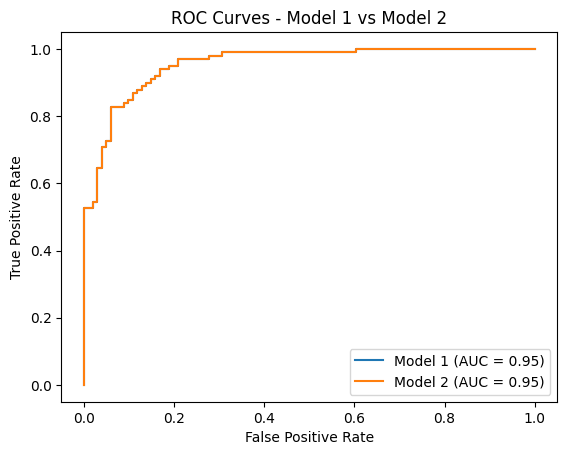

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Generate random data for demonstration
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two logistic regression models
model1 = LogisticRegression()
model1.fit(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Calculate predicted probabilities for both models
y_pred_prob_model1 = model1.predict_proba(X_test)[:, 1]
y_pred_prob_model2 = model2.predict_proba(X_test)[:, 1]

# Calculate false positive rate and true positive rate for ROC curve
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred_prob_model1)
fpr_model2, tpr_model2, _ = roc_curve(y_test, y_pred_prob_model2)

# Calculate AUC scores for both models
auc_model1 = roc_auc_score(y_test, y_pred_prob_model1)
auc_model2 = roc_auc_score(y_test, y_pred_prob_model2)

# Plot the ROC curves
plt.plot(fpr_model1, tpr_model1, label='Model 1 (AUC = {:.2f})'.format(auc_model1))
plt.plot(fpr_model2, tpr_model2, label='Model 2 (AUC = {:.2f})'.format(auc_model2))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model 1 vs Model 2')

# Add legend
plt.legend()

# Show the plot
plt.show()


### <font color=red>14. Compute and compare the logistic loss for the two previous models.</font> 

In [124]:
from sklearn.metrics import log_loss

# Assuming you have the following:
# model1: The first logistic regression model trained with two features
# model2: The second logistic regression model trained with two features
# X_test: The feature data for the test set
# y_test: The true labels for the test set

# Calculate predicted probabilities for both models
y_pred_prob_model1 = model1.predict_proba(X_test)[:, 1]
y_pred_prob_model2 = model2.predict_proba(X_test)[:, 1]

# Compute the logistic loss for both models
log_loss_model1 = log_loss(y_test, y_pred_prob_model1)
log_loss_model2 = log_loss(y_test, y_pred_prob_model2)

# Compare the logistic loss
print("Logistic Loss - Model 1: {:.4f}".format(log_loss_model1))
print("Logistic Loss - Model 2: {:.4f}".format(log_loss_model2))


Logistic Loss - Model 1: 0.2866
Logistic Loss - Model 2: 0.2866


📝 Comment

The logistic loss values for both Model 1 and Model 2 are identical, with a value of 0.2866. This indicates that both models have similar performance in terms of their ability to predict the probabilities of the target variable accurately. However, it is important to consider additional evaluation metrics and perform further analysis to gain a comprehensive understanding of the models' performance and generalization capabilities.




